# TLE-HC volume

**Overview**

This notebook will examine volumetric features of the hippocampus in TLE patients. We compare the ipsilateral foci hippocampi to 
contralateral, and to age-matched controls.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib
import hippomaps as hm
import pandas as pd
import glob

In [2]:
hippunfold_dir = '/data/mica3/BIDS_NKG1/derivatives/hippunfold_v1.3.0/hippunfold'
micapipe_dir = '/data/mica3/BIDS_NKG1/derivatives/micapipe_v0.2.0'

hemis = ['L','R']
labels = ['hipp']#,'dentate'] 
den = '0p5mm'

# get expected number of vertices and their indices
nV,iV = hm.config.get_nVertices(labels,den) 

# loop through these types of structural images
features = ['FA','ADC','thickness']

### PX

In [3]:
PX = pd.read_csv(f'participants_NKG1_px.csv', delimiter=',')
PX

,ID,SES,SITE,group,pathology,AGE,SEX,T1W,DWI
0,sub-PX001,ses-pre,NKG1,Patient,Left TLE,25,F,1,1
1,sub-PX002,ses-pre,NKG1,Patient,Left TLE,23,F,1,1
2,sub-PX003,ses-pre,NKG1,Patient,Left TLE,18,M,1,1
3,sub-PX004,ses-pre,NKG1,Patient,Left TLE,17,F,1,1
4,sub-PX005,ses-pre,NKG1,Patient,Left TLE,19,F,1,1
5,sub-PX006,ses-pre,NKG1,Patient,Left TLE,23,M,1,1
6,sub-PX007,ses-pre,NKG1,Patient,Left TLE,37,M,1,1
7,sub-PX008,ses-pre,NKG1,Patient,Left TLE,25,M,1,1
8,sub-PX009,ses-pre,NKG1,Patient,Left TLE,22,M,1,1
9,sub-PX010,ses-pre,NKG1,Patient,Left TLE,40,F,1,1


In [4]:
# intialize the matrix for loading data into
hipp_dat_vol_PX = np.zeros([nV,len(hemis),len(PX['ID']),len(features)])*np.nan
!mkdir -p tmp # store intermediate files temporarily

for s,sub in enumerate(PX['ID']):
    for h,hemi in enumerate(hemis):
        if PX['pathology'][s][0] == hemi:
            ic = 0 # always put ipsi first
        else:
            ic = 1 # contra second
        for l,label in enumerate(labels):
            # sample data to each surface
            for f,feature in enumerate(features):
                fn = []
                if feature != 'thickness':
                    volname = glob.glob(f'{micapipe_dir}/{sub}/ses-pre/maps/{sub}_ses-pre_space-nativepro_*{feature}.nii.gz')
                    if volname:
                        cmd2 = f'wb_command -volume-to-surface-mapping '\
                            f'{volname[0]} '\
                            f'{hippunfold_dir}/{sub}/ses-pre/surf/{sub}_ses-pre_hemi-{hemi}_space-T1w_den-{den}_label-{label}_midthickness.surf.gii '\
                            f'tmp/NKG_{sub}_hemi-{hemi}_label-{label}_{feature}.shape.gii '\
                            f'-trilinear'
                        !{cmd2}
                    fn = f'tmp/NKG_{sub}_hemi-{hemi}_label-{label}_{feature}.shape.gii'
                else:
                    fn = f'{hippunfold_dir}/{sub}/ses-pre/surf/{sub}_ses-pre_hemi-{hemi}_space-T1w_den-{den}_label-{label}_{feature}.shape.gii'
                try:
                    hipp_dat_vol_PX[iV[l],ic,s,f] = nib.load(fn).darrays[0].data    
                    print(f'{sub} {feature} {hemi} done')
                except:
                    print(f'{sub} {feature} {hemi} NOT done')
#!rm -rf tmp

In [5]:
#hipp_dat_vol_PX.view()
np.save('file_PX_NKG1', hipp_dat_vol_PX, allow_pickle=True)

In [6]:
hipp_dat_vol_PX = np.load('file_PX_NKG1.npy')

### HC

In [7]:
HC = pd.read_csv(f'participants_NKG1_hc.csv', delimiter=',')
HC

,ID,SES,SITE,group,pathology,AGE,SEX,T1W,DWI
0,sub-HC001,ses-pre,NKG1,Control,NaN,23,M,1,0
1,sub-HC002,ses-pre,NKG1,Control,NaN,33,F,1,0
2,sub-HC003,ses-pre,NKG1,Control,NaN,24,M,1,0
3,sub-HC004,ses-pre,NKG1,Control,NaN,24,F,1,0
4,sub-HC005,ses-pre,NKG1,Control,NaN,21,F,1,0
5,sub-HC006,ses-pre,NKG1,Control,NaN,24,F,1,0
6,sub-HC007,ses-pre,NKG1,Control,NaN,24,F,1,0
7,sub-HC008,ses-pre,NKG1,Control,NaN,24,M,1,0
8,sub-HC009,ses-pre,NKG1,Control,NaN,24,M,1,0
9,sub-HC010,ses-pre,NKG1,Control,NaN,24,F,1,0


In [8]:
#volname = f'{micapipe_dir}/{sub}/ses-pre/maps/{sub}_ses-pre_space-nativepro_model-DTI_map-{feature}.nii.gz'
#volname

In [9]:
# Note that all data is already aligned in space-T1w AKA space-nativepro!
# intialize the matrix for loading data into
hipp_dat_vol_HC = np.zeros([nV,len(hemis),len(HC['ID']),len(features)])*np.nan
!mkdir -p tmp # store intermediate files temporarily

for s,sub in enumerate(HC['ID']):
    for h,hemi in enumerate(hemis):
        for l,label in enumerate(labels):
            # sample data to each surface
            for f,feature in enumerate(features):
                fn = []
                if feature != 'thickness':
                    volname = glob.glob(f'{micapipe_dir}/{sub}/ses-pre/maps/{sub}_ses-pre_space-nativepro_*{feature}.nii.gz')
                    if volname:
                        cmd2 = f'wb_command -volume-to-surface-mapping '\
                            f'{volname[0]} '\
                            f'{hippunfold_dir}/{sub}/ses-pre/surf/{sub}_ses-pre_hemi-{hemi}_space-T1w_den-{den}_label-{label}_midthickness.surf.gii '\
                            f'tmp/NKG_{sub}_hemi-{hemi}_label-{label}_{feature}.shape.gii '\
                            f'-trilinear'
                        !{cmd2}
                    fn = f'tmp/NKG_{sub}_hemi-{hemi}_label-{label}_{feature}.shape.gii'
                else:
                    fn = f'{hippunfold_dir}/{sub}/ses-pre/surf/{sub}_ses-pre_hemi-{hemi}_space-T1w_den-{den}_label-{label}_{feature}.shape.gii'
                # now load the data!
                try:
                    hipp_dat_vol_HC[iV[l],h,s,f] = nib.load(fn).darrays[0].data    
                    print(f'{sub} {feature} {hemi} done')
                except:
                    print(f'{sub} {feature} {hemi} NOT done')

#!rm -rf tmp

In [10]:
#hipp_dat_vol_PX.view()
np.save('file_HC_NKG1', hipp_dat_vol_HC, allow_pickle=True)

In [11]:
hipp_dat_vol_HC = np.load('file_HC_NKG1.npy')

In [12]:
np.sum(np.any(np.isnan(hipp_dat_vol_HC),axis=(0,1)))

52

## 1) plot group-averages

THIS NEEDS TO BE UPDATED TO ACCOMMODATE VOLUMETRIC DATA

Here we plot averages of the ipsilateral seizure focus, contralalteral, and healthy controls. We then compare ipsilateral to contralalteral (an asymmetry analysis) and ipsilateral to controls (case-control differences). Asymmetry is nice since it includes perfect matching on things like demographics, etc., but in cases with severe epilepsy there can also be abnormalities or secondary epileptogenic zones in the contralateral hemisphere as well. Case-control differences are less closely matched, but we can be confident that the HC data is normative. 

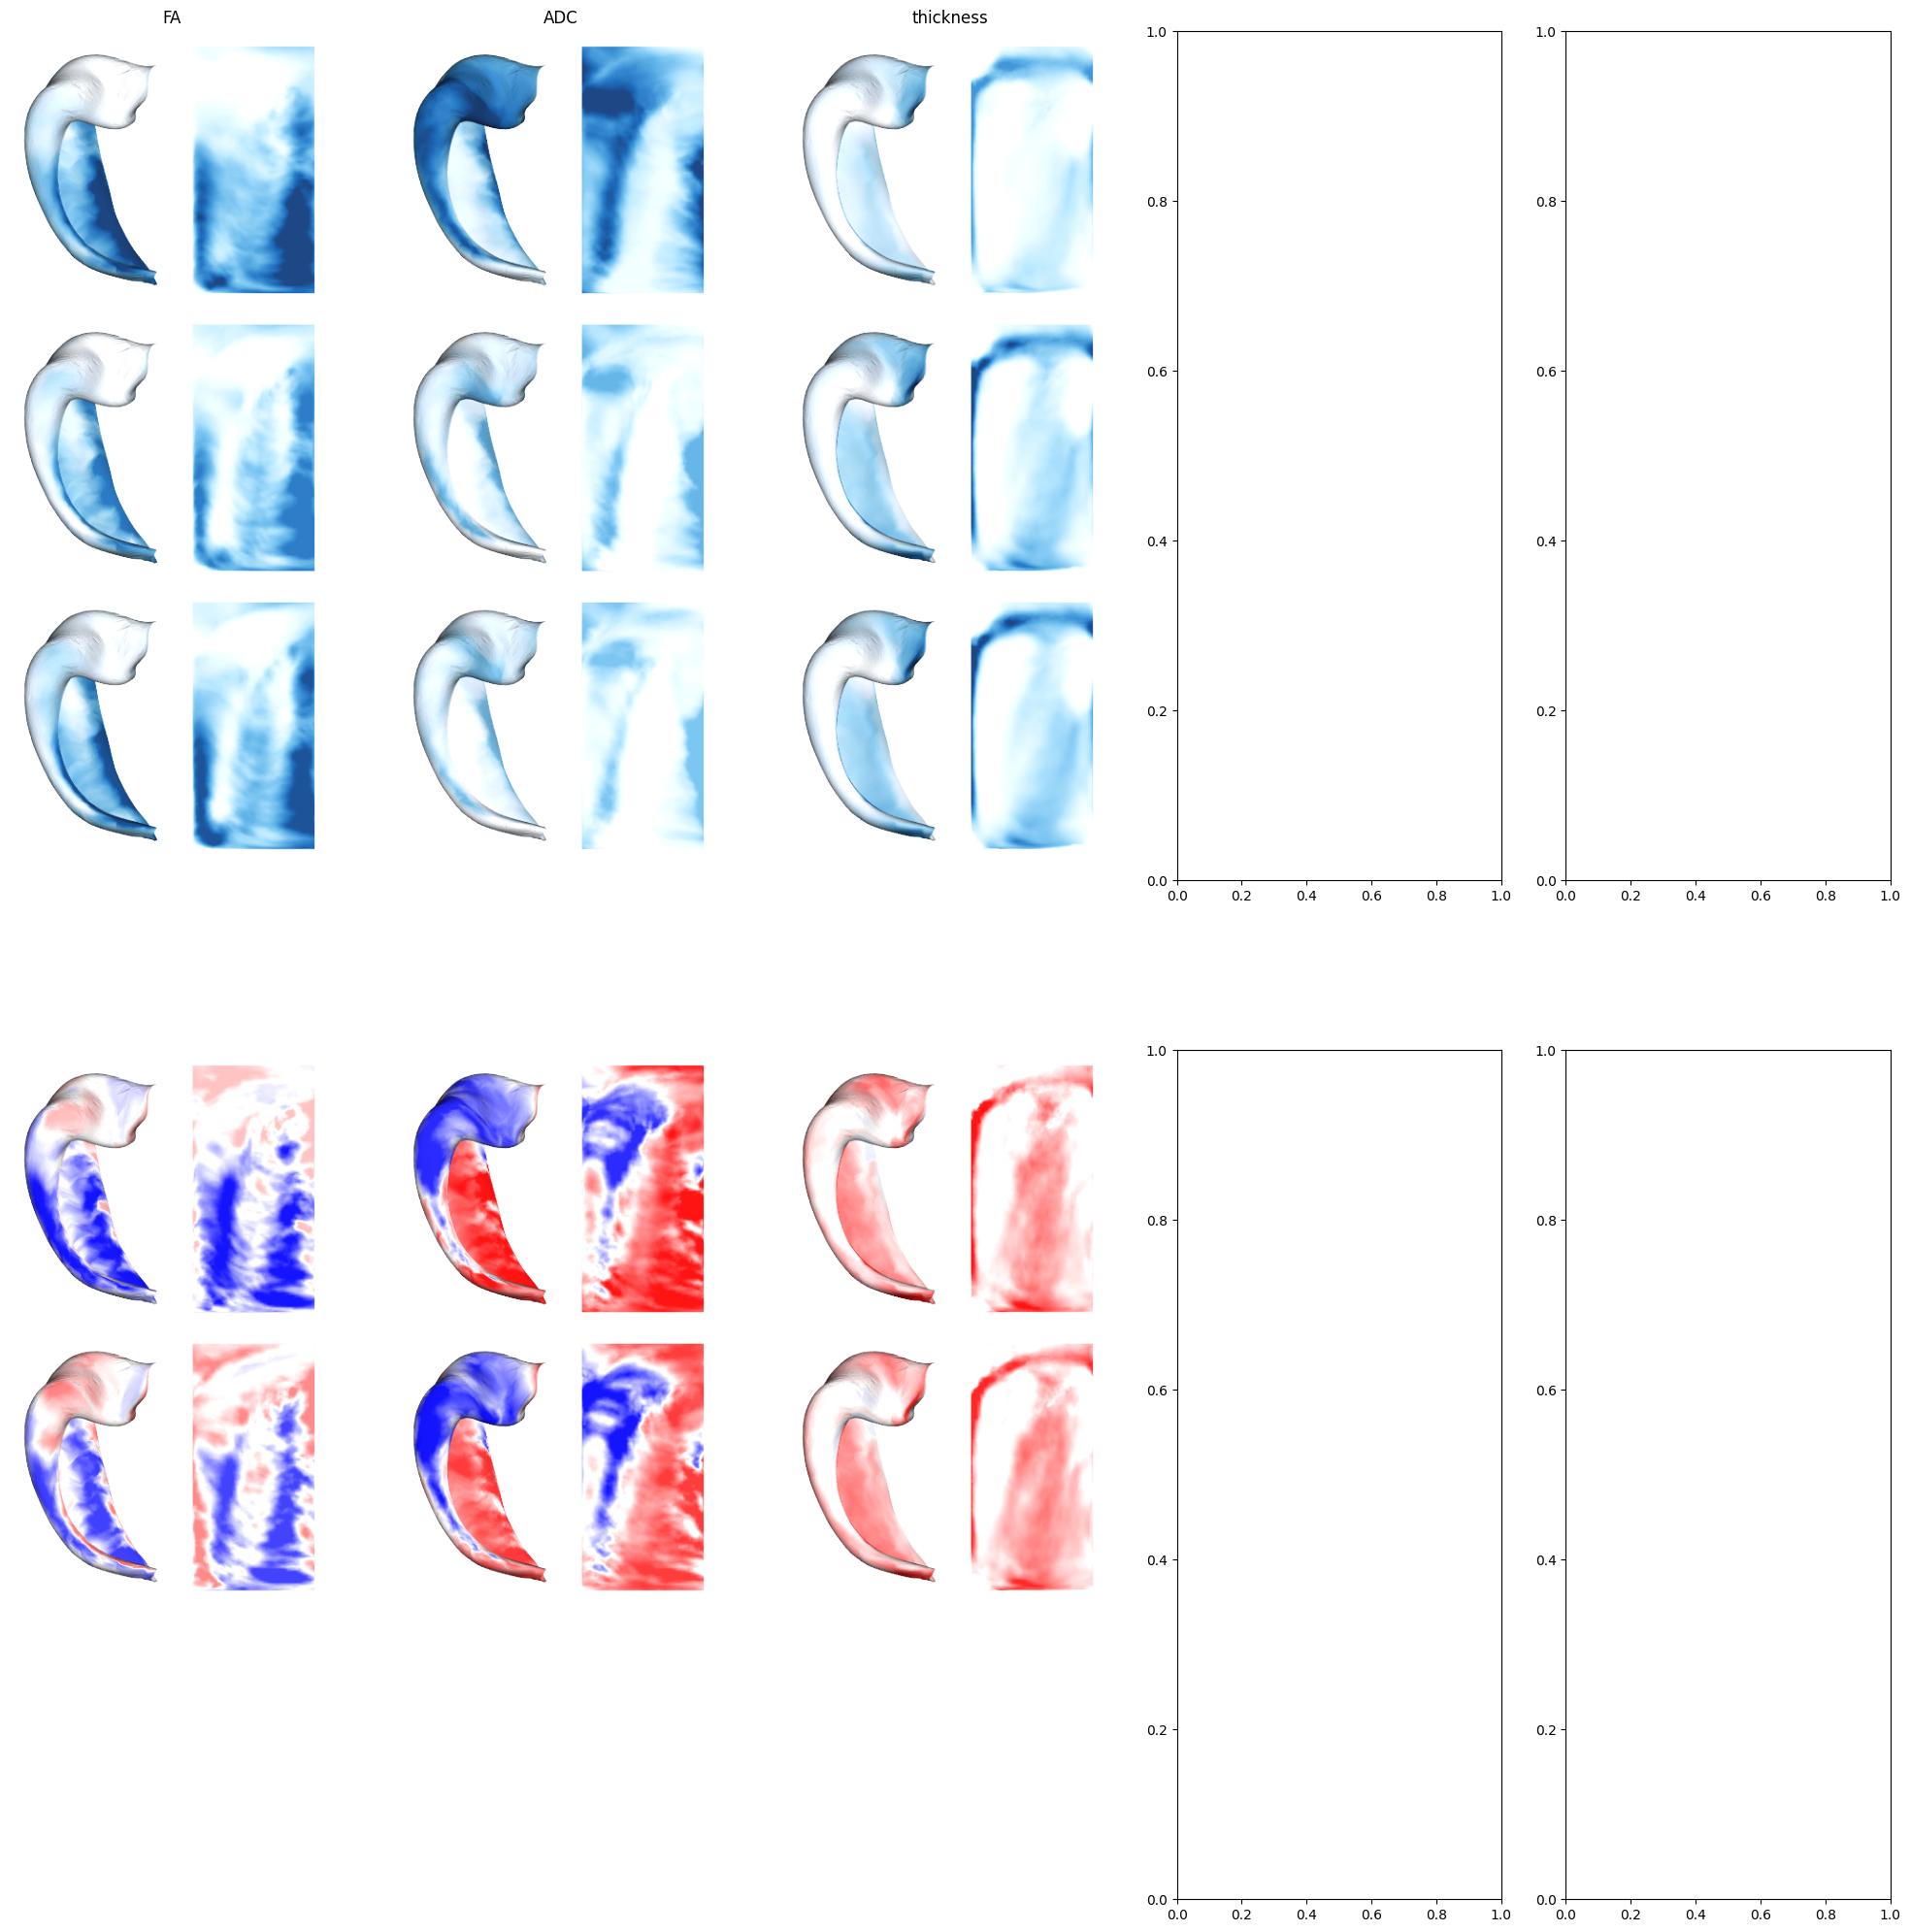

In [13]:
ipsilateral = np.nanmean(hipp_dat_vol_PX[:,0,:,:], axis=1)
contralateral = np.nanmean(hipp_dat_vol_PX[:,1,:,:], axis=1)
ctrl = np.nanmean(hipp_dat_vol_HC,axis=(1,2))
asymmetry = contralateral-ipsilateral
caseCtrl = ctrl-ipsilateral

cdata1 = np.stack((ipsilateral,contralateral,ctrl),axis=2) # these will share color range
cdata2 = np.stack((asymmetry,caseCtrl),axis=2) # these will share their own separate color range

# plot altogether
fig, ax = plt.subplots(2,5, figsize=(25,25))
for f in range(len(features)):
    hm.plotting.surfplot_canonical_foldunfold(cdata1[:,f,:], hemis=['L'], labels=['hipp'], cmap='Blues', color_range='sym', unfoldAPrescale=True, share='both', tighten_cwindow=True, embed_nb=True, screenshot=True, filename='tmp.png')
    i = plt.imread('tmp.png')
    ax[0,f].imshow(i)
    ax[0,f].set_axis_off()
    ax[0,f].set_anchor("NW")
    ax[0,f].set_title(features[f])
    hm.plotting.surfplot_canonical_foldunfold(cdata2[:,f,:], hemis=['L'], labels=['hipp'], cmap='bwr', color_range='sym', unfoldAPrescale=True, share='both', tighten_cwindow=True, embed_nb=True, screenshot=True, filename='tmp.png')
    i = plt.imread('tmp.png')
    ax[1,f].imshow(i)
    ax[1,f].set_axis_off()
    ax[1,f].set_anchor("NW")
    
!rm tmp.png

In [14]:
ipsilateralCtrl = np.zeros((nV,len(PX),len(features)))
ctrl = np.nanmean(hipp_dat_vol_HC,axis=(1,2))

for s in range(hipp_dat_vol_PX.shape[2]):
    for f,feat in enumerate(features):
        ipsilateralCtrl[:,s,f] = ctrl[:,f]-hipp_dat_vol_PX[:,0,s,f]

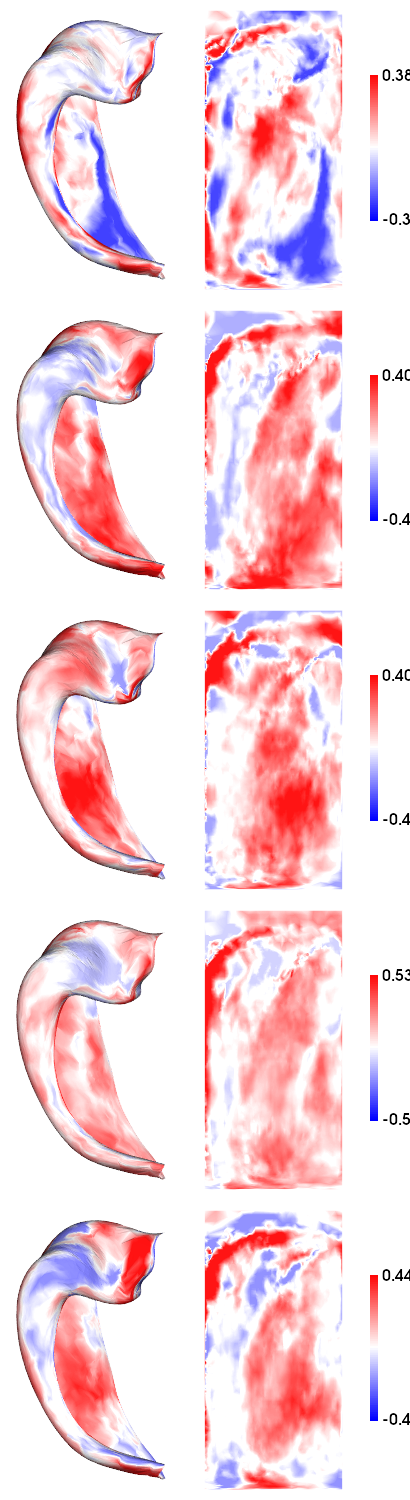

In [22]:
hm.plotting.surfplot_canonical_foldunfold(ipsilateralCtrl[:,:5,2], color_bar=('right'), hemis=['L'], labels=['hipp'], cmap='bwr', color_range='sym', unfoldAPrescale=True, share='row', tighten_cwindow=True, embed_nb=True, )

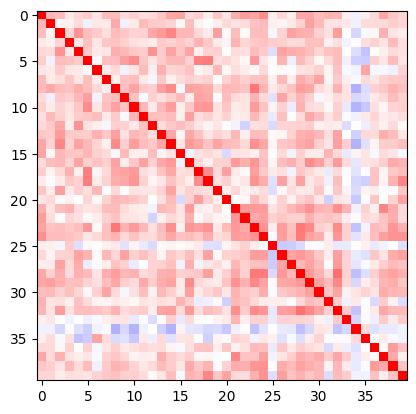

In [23]:
R = np.corrcoef(ipsilateralCtrl[:,:,1].T)
plt.imshow(R, cmap='bwr', vmin=-1, vmax=1)

In [24]:
np.mean(R[np.triu_indices(len(PX),k=1)])

0.15827889847069818

(array([['histology-Bieloschowsky', 'iEEG-BandPower-beta',
         'iEEG-BandPower-alpha'],
        ['iEEG-BandPower-alpha', 'iEEG-BandPower-delta',
         'histology-Calretinin'],
        ['MRI-7T-thickness', 'histology-thickness',
         'histology-gyrification']], dtype=object),
 array([[-0.40327915, -0.40176543, -0.37512177],
        [ 0.70868381, -0.68579165, -0.62497149],
        [ 0.49224523,  0.2725057 ,  0.20826639]]),
 array([[0.015, 0.067, 0.068],
        [0.   , 0.   , 0.   ],
        [0.   , 0.012, 0.016]]),
 array([[0.43695614, 0.45159673, 0.11377282]]),
 array([0.36921568, 0.56084867, 0.36394042]),
 <Axes: xlabel="absolute AP correlation (Pearnson's R)", ylabel="absolute subfield correlation (Spearmann's R)">)

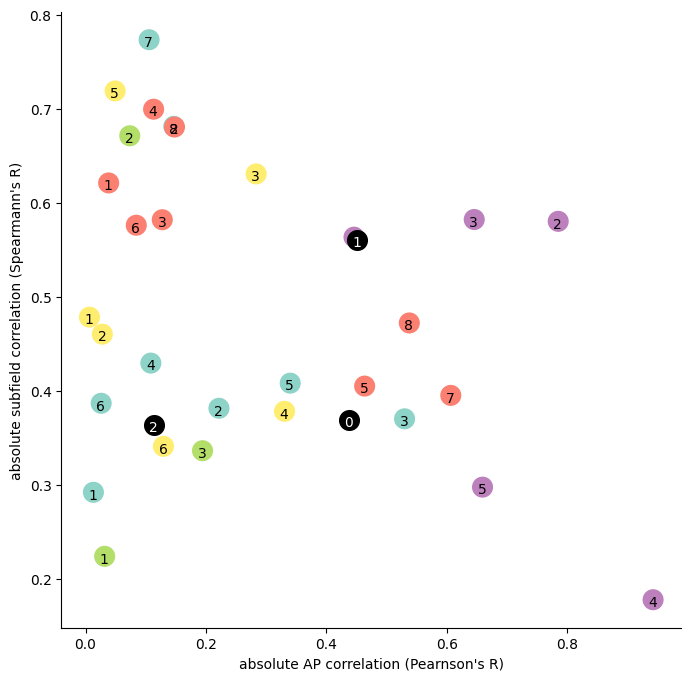

In [18]:
hm.stats.contextualize2D(caseCtrl)

In [19]:
#hm.plotting.surfplot_canonical_foldunfold(cdata1[:,f,:], color_bar=('right'), hemis=['L'], labels=['hipp'], cmap='Blues', color_range='sym', unfoldAPrescale=True, share='both', tighten_cwindow=True, embed_nb=True, screenshot=True, filename='tmp.png')


## 2) Examine inter-patient (ipsilateral) consistency

Here, we focus only on case-control differences for each ispilateral hippocampus to the control average

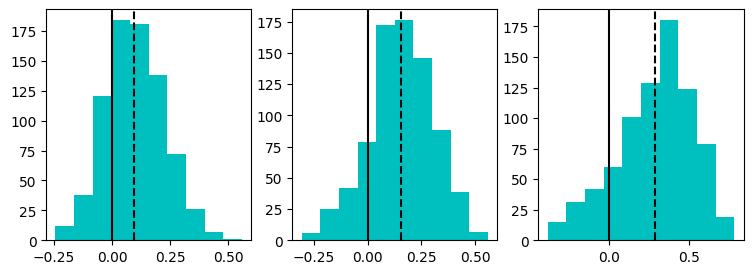

In [20]:
from scipy.stats import ttest_1samp

# make a histogram of the off-diagonal cross-patient correlations
mfcorr = []
sdfcorr = []
fig, ax = plt.subplots(nrows=1, ncols=len(features), figsize=(3*len(features),3))
for f,feature in enumerate(features):
    cdat = (ctrl[:,f]-hipp_dat_vol_PX[:,0,:,f].T).T
    corr = np.corrcoef(cdat.T) # as above 2
    fcorr = corr[np.triu_indices(len(PX),k=1)] # this return only the off-diagonal (lower left triangle)
    print(ttest_1samp(fcorr,0,nan_policy='omit'))
    ax[f].hist(fcorr, color = 'c') # make a histogram for this particular feature
    ax[f].axvline(x=0, color='k')
    ax[f].axvline(x=np.mean(fcorr), color='k', linestyle = 'dashed')
    mfcorr.append(np.mean(fcorr))
    sdfcorr.append(np.std(fcorr))

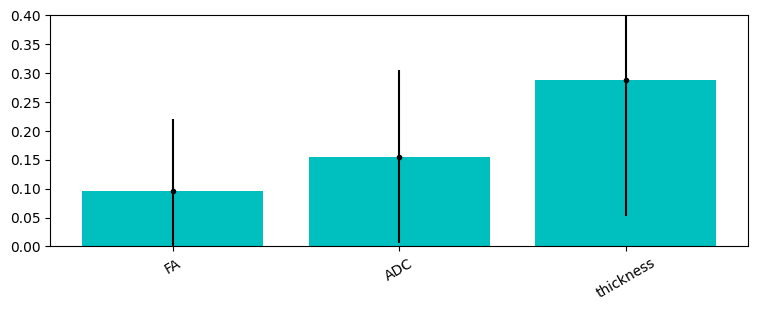

In [21]:
# instead of histograms, we will show a bar plot of the average and standard deviation
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(3*len(features),3))
plt.bar(range(len(features)),mfcorr, color = 'c')
plt.errorbar(range(len(features)),mfcorr, yerr=sdfcorr, fmt=".", color = 'k')
plt.xticks(ticks=range(len(features)),labels=features,rotation=30)
plt.ylim([0,.4]);

## 3) contextualize with other maps (add later)